In [1]:
# imports
import numpy as np
import scipy
from scipy.stats import norm, truncnorm
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.ion()

In [2]:
# print what the function is about
print(norm.__doc__)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale

In [3]:
# Initial parameters for the distributions.
# height distribution
h_mu = 163
h_sigma = 10
# IQ distribution
q_mu = 100
q_sigma = 15

In [4]:
# random samples from height distribution
h_rvs = norm.rvs(loc=h_mu, scale=h_sigma, size=10000) 
plt.hist(h_rvs) # histogram of the samples
# label axes
plt.xlabel("height, $h$")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

Error in callback <function _draw_all_if_interactive at 0x000001EA16D57250> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [5]:
# define a function for the PDF
def norm_pdf(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x-mu)/sigma)**2)/sigma/np.sqrt(2 * np.pi)

Text(0, 0.5, '$\\rho(h)$')

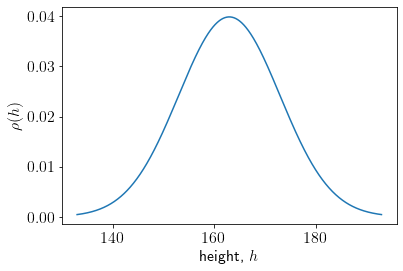

In [6]:
x = np.linspace(h_mu-3*h_sigma, h_mu+3*h_sigma, 1000)
y = norm_pdf(x, mu=h_mu, sigma=h_sigma)
plt.plot(x, y)
plt.xlabel("height, $h$")
plt.ylabel("$\\rho(h)$")

Text(0, 0.5, 'frequency')

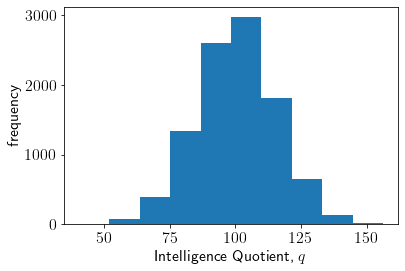

In [7]:
# random samples from the IQ distribution
q_rvs = norm.rvs(loc=q_mu, scale=q_sigma, size=10000)
plt.hist(q_rvs)
plt.xlabel("Intelligence Quotient, $q$")
plt.ylabel("frequency")

Text(0, 0.5, 'Intelligence Quotient, $q$')

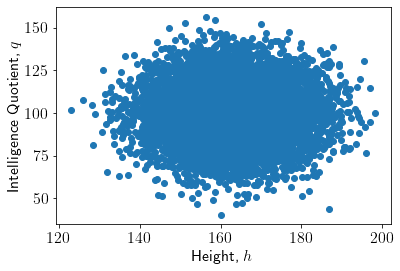

In [8]:
# plotting samples from both distributions
plt.scatter(h_rvs, q_rvs)
plt.xlabel("Height, $h$")
plt.ylabel("Intelligence Quotient, $q$")

In [13]:
# sampling from a multi-variate distribution 
mean_vect = np.array([7.5, 7.5, 7.5, 7.5])
std_dev_vect = np.array([2, 2, 2, 2])
lower = np.array([1, 1, 1, 1])
upper = np.array([16, 16, 16, 16])

In [10]:
# sampling from a Truncated Normal distribution
def tnorm_rvs(mean_vect, sigma_vect, lower, upper, size=1000):
    a, b = (lower - mean_vect)/std_dev_vect, (upper - mean_vect)/std_dev_vect
    samples = np.zeros(shape=(size, len(mean_vect)))
    for i in range(len(mean_vect)):
        samples[:,i] = truncnorm.rvs(a[i], b[i], loc=mean_vect[i], 
                        scale=sigma_vect[i], size=size)
    return samples

In [14]:
Y = tnorm_rvs(mean_vect, std_dev_vect, lower, upper)

In [15]:
Y

array([[ 8.3830909 ,  7.95354038,  9.71583461,  6.59995968],
       [10.16380537,  5.82221102,  4.70364575,  7.73096816],
       [ 4.52760399,  4.82377123,  9.40467524,  7.3114436 ],
       ...,
       [ 2.27516146, 11.59216765,  6.6586149 ,  8.53621071],
       [ 5.31972135,  7.44825846,  7.02430741,  8.1750445 ],
       [ 7.74828497,  8.35027536,  9.21857675,  5.45137957]])

Text(0, 0.5, 'IQ, $q$')

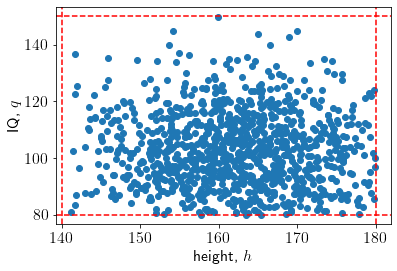

In [12]:
plt.scatter(Y[:,0], Y[:,1])
plt.axvline(lower[0], color="red", ls="dashed")
plt.axvline(upper[0], color="red", ls="dashed")
plt.axhline(lower[1], color="red", ls="dashed")
plt.axhline(upper[1], color="red", ls="dashed")
plt.xlabel("height, $h$")
plt.ylabel("IQ, $q$")